# Poincare Maps For Toxicology

Poincare embeddings are a state of the art embedding originally devised for NLP. Borrowing ideas from social network theory and hypothesizing that words can be hierarchical (given that the topology of many complex data is, and that this property can be derived from the exponential nature of Zipf Law) poincare embeddings embedded words in hyperbolic space using poincare n-ball formalization on a riemann manifold. This paradigm of NLP lends itself incredibly well to biological data and in 2019, facebook published poincare maps on biorxiv (currently under reveiew for nature communications) which is used for single cell data analysis. While this has not been formally peer reviewed, I believe that this algorithm shows incredibly great potential for visualizing the latent space of xenobiotic pertubations of gene expression. I plan to test this idea on a couple of data sets and use an optimized form for the Allen Institute Dream Cell Lineage Reconstruction Challenge.

The first will be a look into the visualization of this data on the dataset from nature article by Halpern et. al 2017  doi: 10.1038/nature21065.

## Data Importing and Processing

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = []
index = []
with open("../data/nature21065-s2/miceSC_Halpern_2017.txt", "r") as f:
    headers = f.readlines(1)[0].split()
    header = headers[-1415:]
    for i in f.readlines()[1:]:
        line = i.split()
        index.append(line[0])
        nline = line[-1415:]
        data.append(nline)

In [3]:
df = pd.DataFrame(data, columns = header, index = index)
df = df.T

In [4]:
df

,0610007L01Rik,0610007P08Rik;Rad26l,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B22Rik,0610009D07Rik,0610009O20Rik,0610010B08Rik;Gm14434;Gm14308,0610010F05Rik;mKIAA1841;Kiaa1841,...,mTPK1;Tpk1,mimp3;Igf2bp3;AK045244,mszf84;Gm14288;Gm14435;Gm8898,mt-Nd4,mt3-mmp;Mmp16,rp9,scmh1;Scmh1,slc43a2;Slc43a2,tsec-1;Tex9,tspan-3;Tspan3
Cell1,9.476744e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.186047e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Cell2,9.476744e-01,0.000000e+00,9.883721e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.918605e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Cell3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,6.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Cell4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.666667e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Cell5,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,6.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Cell6,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Cell7,3.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.666667e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Cell8,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Cell9,4.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.666667e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Cell10,2.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


The data may need to be imputed in R, so I will be using MAGIC to do so.

In [5]:
df.to_csv("../data/nature21065-s2/miceSC_Halpern_2017_transpose.csv")

Here we will be doing preliminary visualization with PCA, TSNE, UMAP and the poincare ball. Then I will be doing the same after imputation with Magic.

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

In [7]:
scData = df.values
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)
umap = UMAP(n_components=2)
decomp = pca.fit(scData)
print(pca.explained_variance_ratio_)
decomp = decomp.transform(scData)

[0.75149623 0.14446648]


In [8]:
mani = tsne.fit_transform(scData)

In [9]:
uniriem = umap.fit_transform(scData)

C:\Users\Omar Kana\Miniconda3\lib\site-packages\umap\umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "..\..\..\Miniconda3\lib\site-packages\umap\umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
C:\Users\Omar Kana\Miniconda3\lib\site-packages\numba\compiler.py:742: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "..\..\..\Miniconda3\lib\site-packages\umap\umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
C:\Users\Omar Kana\Miniconda3\lib\site-packages\numba\compiler.py:751: NumbaDeprecationWarning: 
Fall-back from the nopython compilation pat

In [36]:
import matplotlib.pyplot as plt

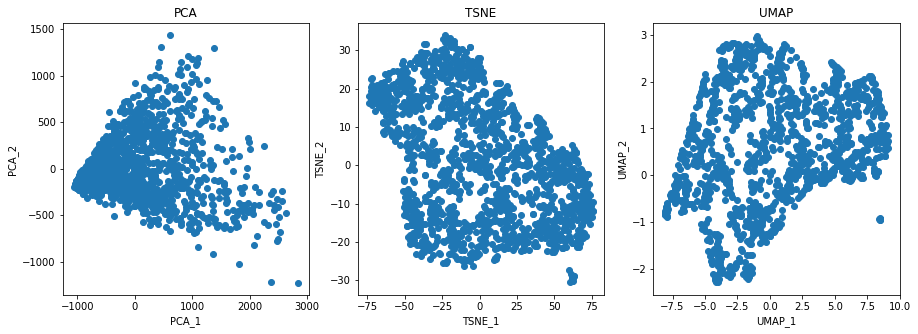

In [15]:
dim1 = [i[:, 0] for i in [decomp, mani, uniriem]]
dim2 = [i[:, 1] for i in [decomp, mani, uniriem]]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = [15,5])
redux = ["PCA", "TSNE", "UMAP"]
for i in range(len(dim1)):
    ax[i].scatter(dim1[i], dim2[i])
    ax[i].set_title(redux[i])
    ax[i].set_xlabel(redux[i] + "_1")
    ax[i].set_ylabel(redux[i] + "_2")
plt.show()

Here we see a triangular structure in the PCA data. TSNE and UMAP seem to find similar shapes underlying learned manifolds. Looking at this, I'll try to cluster with KMeans and Agglomerative clustering to formulate graphs of the data. This is required for poincare map visualizations.

In [17]:
from sklearn.cluster import AgglomerativeClustering as AC
#Took too long to run OPTICS. May be better to run DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import KMeans

In [23]:
ACClust = AC().fit_predict(scData)
KMClust = KMeans(n_clusters = 3, random_state = 42).fit_predict(scData)

In [34]:
from matplotlib import cm

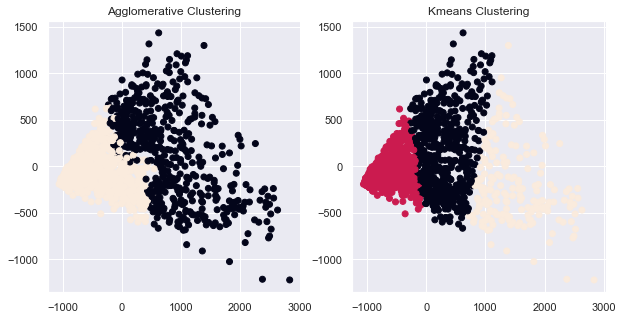

In [37]:
#Visualize Clustering in PCA space
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(dim1[0], dim2[0], c=ACClust)
plt.title("Agglomerative Clustering")
plt.subplot(122)
plt.scatter(dim1[0], dim2[0], c=KMClust)
plt.title("Kmeans Clustering")
plt.show()

In [32]:
#Embedding in Poincare Space
#The Following Code comes from https://github.com/facebookresearch/PoincareMaps/blob/master/main.py
#Credit to  Klimovskaia et. al (in consideration by nature communications as of 10/13/2019)
from sklearn.metrics.pairwise import pairwise_distances
from torch.utils.data import TensorDataset
import torch

from data import create_output_name, prepare_data, compute_rfa
from model import PoincareEmbedding, PoincareDistance
from model import poincare_root, poincare_translation
from rsgd import RiemannianSGD
from train import train
from visualize import *

import timeit



In [40]:
read_data("../data/nature21065-s2/miceSC_Halpern_2017_transpose", with_labels=False)

ValueError: could not convert string to float: 'Cell1'